## <p style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px"> Table of Contents</p>

<ol>
    <li>
        <a href="">Importing Libraries<a/>
    </li>
    <li>
        <a href="">Reading the Data</a>
    </li>
    <li>
        <a href="">Preprocessing</a>
    </li>
    <li>
        <a href="">Model Architecture</a>
    </li>
    <li>
        <a href="">Model Training</a>
    </li>
    <li>
        <a href="">Results</a>
    </li>
</ol>


## <p id = "lib" style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px">Importing Libraries</p>

In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import plotly.graph_objects as go
from matplotlib.widgets import Slider
import plotly.express as px
from pandas.plotting import autocorrelation_plot
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.utils import plot_model

2024-07-01 16:31:20.503492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 16:31:20.503553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 16:31:20.505150: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## <p id = "lib" style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px">Reading the Data</p>

In [2]:
df = pd.read_csv("/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv",parse_dates = ['Date'])

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.set_index('Date',inplace = True)


In [5]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [6]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB





<div style="border-radius:10px; border: 5px #003300 solid; padding: 15px; background-color: #D0F0C0; font-size: 20px; text-align:left">
<p style="font-family:Cambaria; font-size:18px; color:black; text-align: justify;">There are no null values in the dataframe</p>


</div>

In [8]:
describe_df = df.describe()

def highlight_cells(x):
    mean_color = 'background-color: lightgreen'
    min_color = 'background-color: lightblue'
    max_color = 'background-color: lightcoral'
    volume_color = 'background-color: lightgoldenrodyellow'
    
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    
    df_styler.loc['mean', :] = mean_color
    df_styler.loc['min', :] = min_color
    df_styler.loc['max', :] = max_color
    
    df_styler.loc[:, 'Volume'] = volume_color
    
    return df_styler

styled_describe_df = describe_df.style.apply(highlight_cells, axis=None)\
                                     .format(precision=2)\
                                     .set_caption('Summary Statistics of Volume')

styled_describe_df


,Open,High,Low,Close,Volume,Adj Close
count,1692.00,1692.00,1692.00,1692.00,1692.00,1692.00
mean,132.44,134.77,130.00,132.43,4270740.90,132.43
std,94.31,95.69,92.86,94.31,4295971.35,94.31
min,16.14,16.63,14.98,15.80,118500.00,15.80
25%,30.00,30.65,29.21,29.88,1194350.00,29.88
50%,156.33,162.37,153.15,158.16,3180700.00,158.16
75%,220.56,224.10,217.12,220.02,5662100.00,220.02
max,287.67,291.42,280.40,286.04,37163900.00,286.04


<div style="border-radius: 10px; border: 5px solid #003300; padding: 15px; background-color: #D0F0C0; font-size: 16px; text-align: left; font-family: 'Cambaria';">
    <p style="font-size: 20px; color: black; text-align: justify;">
        <ul style="list-style-type: disc; margin-left: 20px;">
            <li>The average values (mean) for Open, High, Low, and Close prices are around 132.44, 134.77, 130.00, and 132.43 respectively.</li>
            <li>The average volume traded (mean) is approximately 4,270,740 units.</li>
            <li>The volume varies significantly, as indicated by the standard deviation of approximately 4,295,971 units.</li>
            <li>Percentiles (25th, 50th, and 75th) provide insights into the distribution of prices and volume, indicating where data tends to cluster. For example, the 25th percentile of Close price is at 29.88, meaning 25% of the data points have a closing price lower than this value.</li>
        </ul>
    </p>
</div>


## <p id = "lib" style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px">EDA</p>

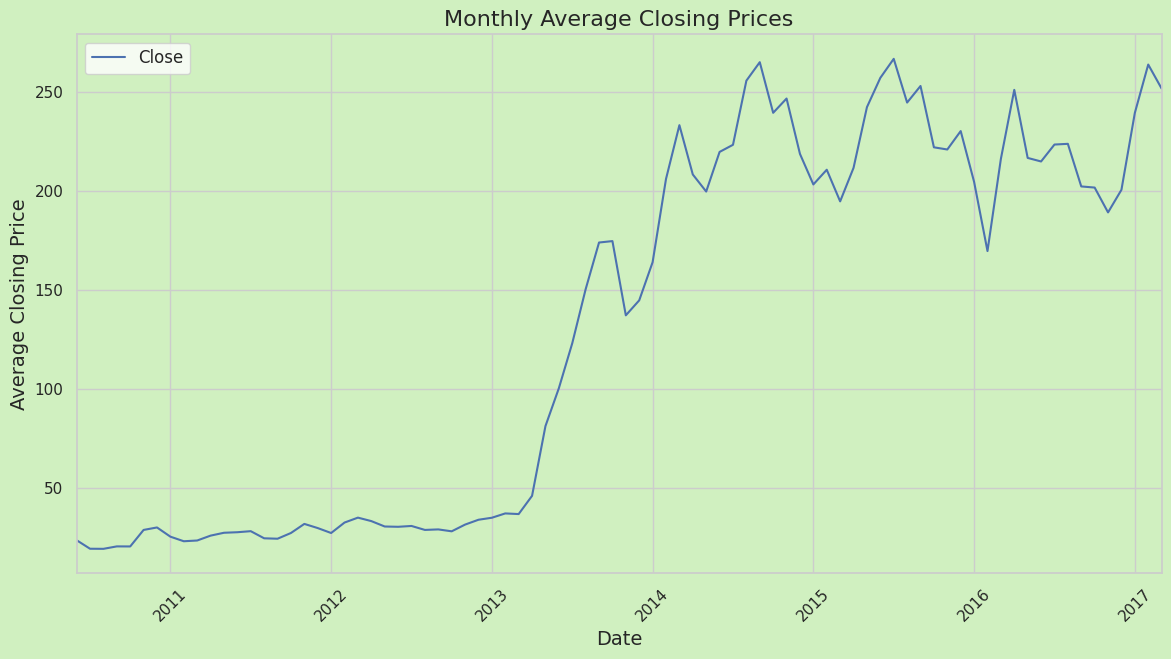

In [9]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 7))

ax = df['Close'].resample('ME').mean().plot()

plt.title('Monthly Average Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Closing Price', fontsize=14)

plt.xticks(rotation=45)

plt.grid(True)

plt.legend(['Close'], loc='best', fontsize=12)

plt.gcf().set_facecolor('#D0F0C0')  
ax.set_facecolor('#D0F0C0') 

plt.show()

<div style="border-radius: 10px; border: 5px solid #003300; padding: 15px; background-color: #D0F0C0; font-size: 16px; text-align: left; font-family: 'Cambaria';">
    <p style="font-size: 20px; color: black; text-align: justify;">
        <ul style="list-style-type: disc; margin-left: 20px;">
            <li>The stock shows an overall upward trend,There was a noticeable increase in Tesla's stock price starting around March 2013.
</li>
            <li>There appear to be recurring patterns where the stock prices peak at certain times of the year and dip at others. Identifying these seasonal trends can be useful for strategic buying and selling.</li>
            <li>A sudden drop in the average closing price can be observed from Nov 2013</li>
           
  </ul>
    </p>
</div>


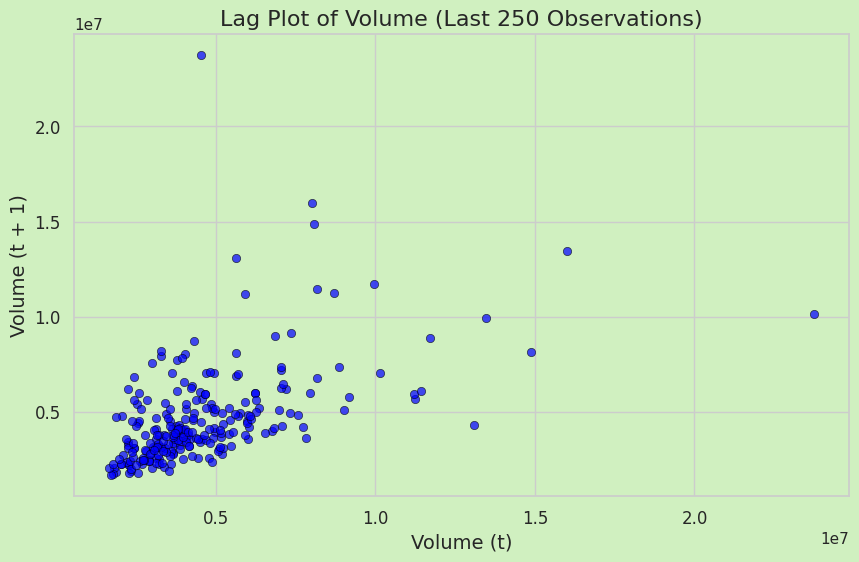

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

lag_plot(df['Volume'].tail(250), c='blue', marker='o', alpha=0.7, edgecolor='black', linewidth=0.5)

plt.title('Lag Plot of Volume (Last 250 Observations)', fontsize=16)
plt.xlabel('Volume (t)', fontsize=14)
plt.ylabel('Volume (t + 1)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gcf().set_facecolor('#D0F0C0') 
plt.gca().set_facecolor('#D0F0C0')  

plt.show()

<div style="border-radius: 10px; border: 5px solid #003300; padding: 15px; background-color: #D0F0C0; font-size: 16px; text-align: left; font-family: 'Cambaria';">
    <p style="font-size: 20px; color: black; text-align: justify;">
        <ul style="list-style-type: disc; margin-left: 20px;">
            <li>The points tend to cluster around a diagonal line from the bottom left to the top right. This pattern suggests that there is a positive autocorrelation in the data, meaning high volume values are often followed by high volume values, and low volume values are followed by low volume values.
</li>
            <li>The clustering of points around the diagonal line indicates a strong linear relationship between the values and their lags, which is typical in time series data where the values are dependent on their previous values.</li>
 
           
  </ul>
    </p>
</div>


In [11]:
df.drop(columns=['Volume','Adj Close'], inplace=True)

In [12]:
df

,Open,High,Low,Close
Date,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001
...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996


In [13]:
fig1 = go.Figure(data=[go.Candlestick(x=df.index,
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'],
                                      increasing_line_color='green',
                                      decreasing_line_color='red')])

fig1.update_layout(
    title='Tesla Stock Chart',
    xaxis_title='Date',
    yaxis_title='Tesla Stock Price',
    xaxis_rangeslider_visible=True,
    template='plotly_white',  
    plot_bgcolor='#D0F0C0',  
    paper_bgcolor='#D0F0C0',  
    title_font=dict(size=24, family='Arial', color='black'),
    xaxis=dict(
        showline=True, 
        showgrid=True,  
        showticklabels=True, 
        linecolor='black', 
        linewidth=2, 
        ticks='outside',
        gridcolor='white'  
    ),
    yaxis=dict(
        showline=True, 
        showgrid=True,  
        showticklabels=True, 
        linecolor='black', 
        linewidth=2, 
        ticks='outside',
        gridcolor='white'  
    ),
    legend=dict(
        x=0.5, 
        y=-0.1, 
        xanchor='center', 
        yanchor='top', 
        orientation='h'
    ),
    margin=dict(l=50, r=50, t=80, b=50)
)

fig1.show()

In [14]:
df['Percent_Fluctuations'] = df['Close'].pct_change() * 100  
fig_returns = px.line(df, x=df.index, y='Percent_Fluctuations', title='Percent Fluctuations Over Time')
fig_returns.update_layout(
    plot_bgcolor='#D0F0C0', 
    paper_bgcolor='#D0F0C0'  
)
fig_returns.show()

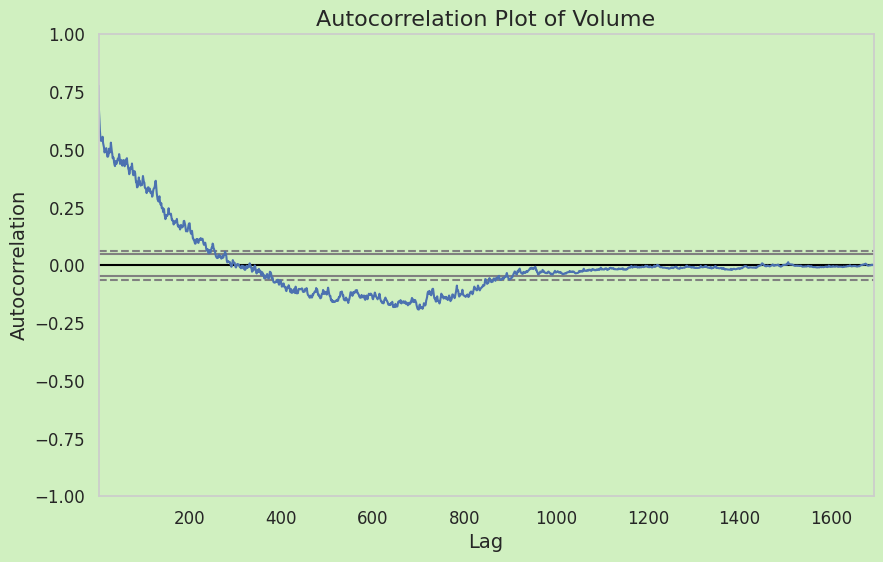

In [15]:
new_df = pd.read_csv("/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv",parse_dates = ['Date'])
# df.set_index('Date',inplace = True)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

autocorrelation_plot(new_df['Volume'])

plt.title('Autocorrelation Plot of Volume', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gcf().set_facecolor('#D0F0C0') 
plt.gca().set_facecolor('#D0F0C0')  


plt.show()

<div style="border-radius: 10px; border: 5px solid #003300; padding: 15px; background-color: #D0F0C0; font-size: 16px; text-align: left; font-family: 'Cambaria';">
    <p style="font-size: 20px; color: black; text-align: justify;">
        <ul style="list-style-type: disc; margin-left: 20px;">
            <li>There is a high autocorrelation at the first few lags, indicating that the trading volume is strongly correlated with its recent past values.
</li>
            <li>The presence of significant autocorrelation suggests that it may be possible to build predictive models for future trading volumes based on past volumes.</li>
 
           
  </ul>
    </p>
</div>


In [16]:
# df = pd.read_csv("/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv",parse_dates = ['Date'])

## <p id = "lib" style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px">Preprocessing</p>

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
df.drop(columns = ['Percent_Fluctuations'],inplace=True)

In [19]:
# df.index.astype('str')

In [20]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

In [21]:
df

,Open,High,Low,Close
Date,,,,
2010-06-29,0.010533,0.030460,0.009645,0.029936
2010-06-30,0.035539,0.050184,0.031347,0.029714
2010-07-01,0.032630,0.033808,0.019931,0.022795
2010-07-02,0.025264,0.023545,0.014053,0.012581
2010-07-06,0.014216,0.012264,0.003202,0.001147
...,...,...,...,...
2017-03-13,0.842191,0.837803,0.858262,0.852464
2017-03-14,0.846941,0.878816,0.870469,0.896240
2017-03-15,0.887047,0.889297,0.901552,0.887840


In [22]:
# df.

In [23]:
df.shape

(1692, 4)

In [24]:
split = int(0.8 * len(df))
train = df[:split]
test = df[split:]

In [25]:
train.shape

(1353, 4)

In [26]:
def prepare_seq(data,seq_len):    
    sequences,labels = [],[]
    for i in range(len(data) - seq_len):   
        x_temp = data.iloc[i:i+seq_len].values 
        y_temp = data.iloc[i+seq_len].values  
        
        sequences.append(x_temp)
        labels.append(y_temp)
    
    return np.array(sequences), np.array(labels)

In [27]:
import numpy as np
seq_len = 50
train_sequences,train_labels = prepare_seq(train, seq_len)
test_sequences,test_labels = prepare_seq(test, seq_len)

## <p id = "lib" style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px">Model Architecture</p>

In [28]:

model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(train_sequences.shape[1], train_sequences.shape[2])))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(4))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [29]:
optimizer = Adam(learning_rate=7e-4, clipvalue=5.0)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

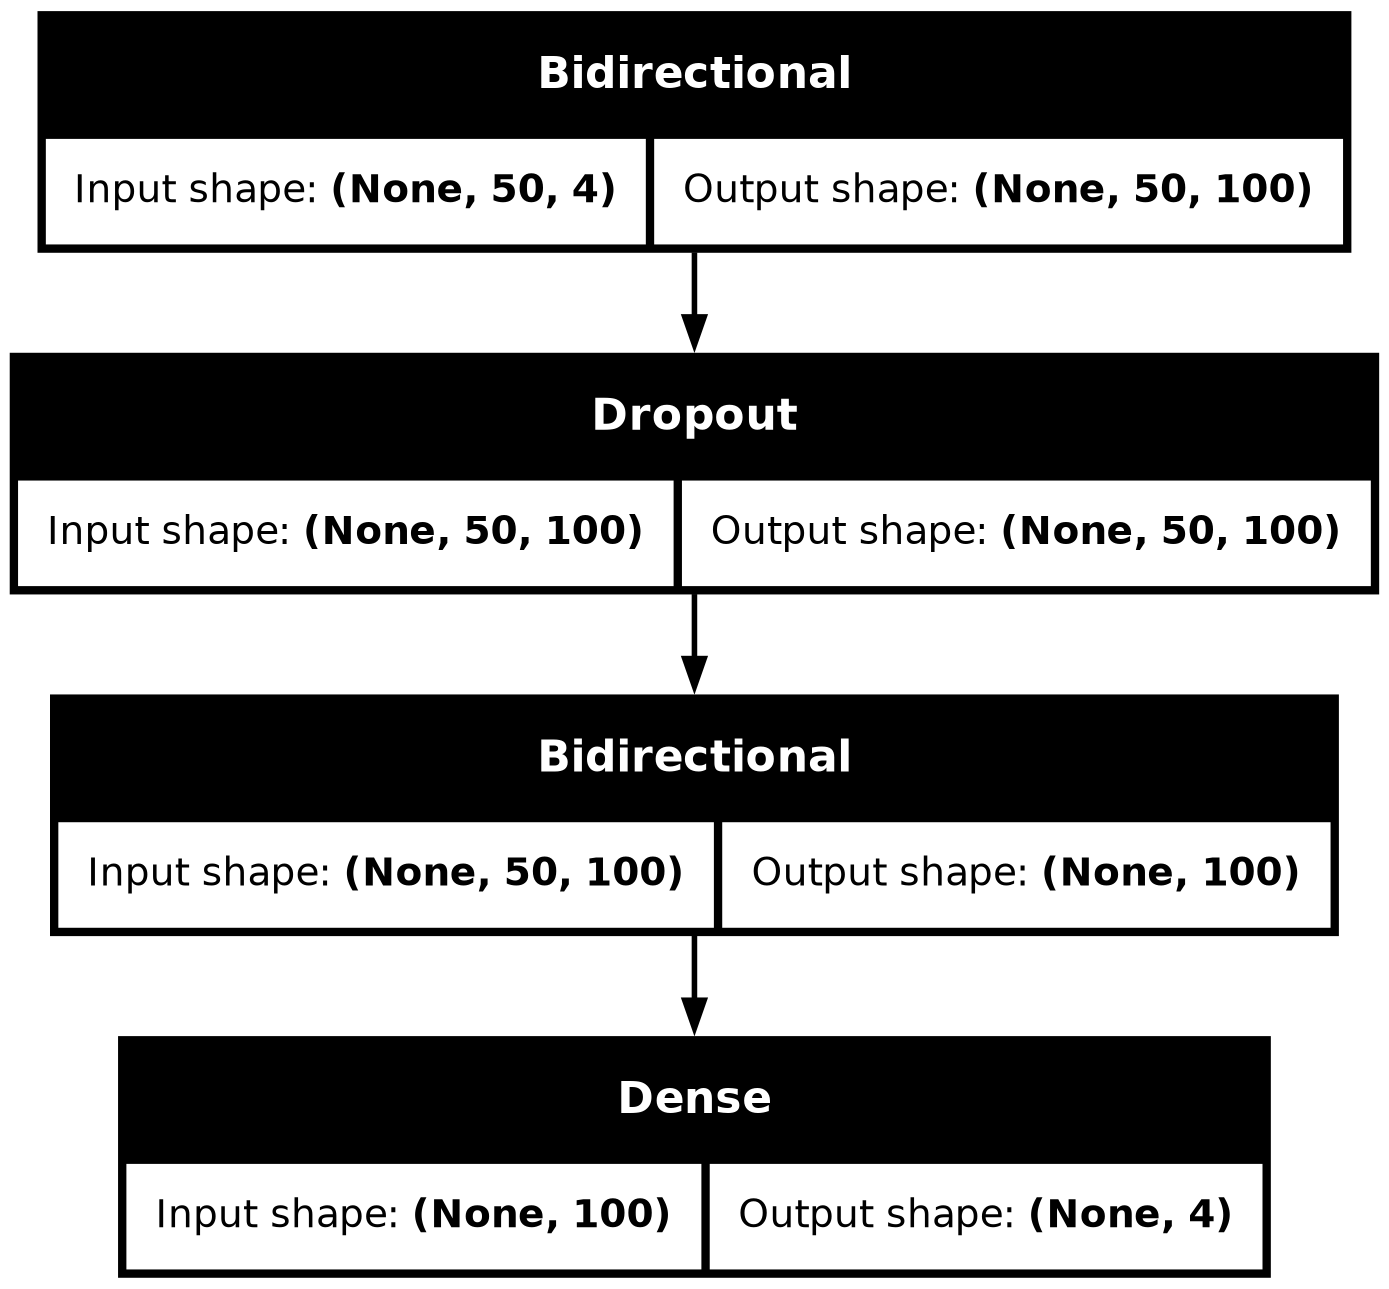

In [30]:

plot_model(model,show_shapes = True)

## <p id = "lib" style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px">Model Training</p>

In [31]:
model.fit(train_sequences,train_labels,epochs=100, validation_data = (test_sequences,test_labels),verbose = 1)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.1002 - mean_absolute_error: 0.1842 - val_loss: 0.0094 - val_mean_absolute_error: 0.0792
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0034 - mean_absolute_error: 0.0381 - val_loss: 0.0058 - val_mean_absolute_error: 0.0608
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0027 - mean_absolute_error: 0.0342 - val_loss: 0.0046 - val_mean_absolute_error: 0.0542
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0023 - mean_absolute_error: 0.0315 - val_loss: 0.0033 - val_mean_absolute_error: 0.0455
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0015 - mean_absolute_error: 0.0259 - val_loss: 0.0026 - val_mean_absolute_error: 0.0397
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0013 - mean_absolute_error: 0.0236 - val_loss: 0.0017 - val_mean_absolute_error: 0.0318
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0012 - mean_absolute_error: 0.0234 - v

In [32]:
predict = model.predict(test_sequences)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [33]:
predict[:5]

array([[0.68938464, 0.69583476, 0.6956336 , 0.70267653],
       [0.67230594, 0.6792998 , 0.67856413, 0.6869868 ],
       [0.6550488 , 0.66232127, 0.66113263, 0.67053324],
       [0.6493713 , 0.6566274 , 0.6554028 , 0.6643095 ],
       [0.6564571 , 0.6632633 , 0.6625679 , 0.66952026]], dtype=float32)

In [34]:
pred = scaler.inverse_transform(predict)

In [35]:
pred[:5]

array([[203.32861, 207.83844, 199.61507, 205.69131],
       [198.69124, 203.29478, 195.08449, 201.45132],
       [194.0054 , 198.62927, 190.45782, 197.00491],
       [192.46379, 197.06465, 188.93701, 195.32301],
       [194.3878 , 198.88814, 190.83878, 196.73116]], dtype=float32)

In [36]:
temp_df = pd.read_csv("/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv",parse_dates = ['Date'])
temp_df.set_index('Date',inplace = True)


In [37]:
columns_to_drop = ['Volume','Adj Close']
temp_df.drop(columns=columns_to_drop, inplace=True)

In [38]:
data_new = pd.concat([temp_df.iloc[-289:].copy(),pd.DataFrame(pred,columns=['open_predicted','high_predicted','low_predicted','close_predicted'],index=temp_df.iloc[-289:].index)], axis=1)

## <p id = "lib" style="font-family:Cambaria; font-weight:bold;  color:#006600; font-size:140%; text-align:left;padding: 0px;  border-bottom: 3px solid #003300;margin-bottom:-30px">Results</p>

In [39]:
data_new

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2016-01-26,196.699997,197.820007,188.880005,193.559998,203.328613,207.838440,199.615067,205.691315
2016-01-27,192.380005,193.259995,185.770004,188.070007,198.691238,203.294785,195.084488,201.451324
2016-01-28,190.789993,191.279999,182.410004,189.699997,194.005402,198.629272,190.457825,197.004913
2016-01-29,189.949997,193.740005,188.080002,191.199997,192.463791,197.064651,188.937012,195.323013
2016-02-01,188.759995,199.520004,182.750000,196.940002,194.387802,198.888138,190.838776,196.731155
...,...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,248.267792,252.689911,243.881363,250.347168
2017-03-14,246.110001,258.119995,246.020004,258.000000,249.095474,253.469910,244.675980,250.904617
2017-03-15,257.000000,261.000000,254.270004,255.729996,256.452911,260.689240,251.955078,257.295349


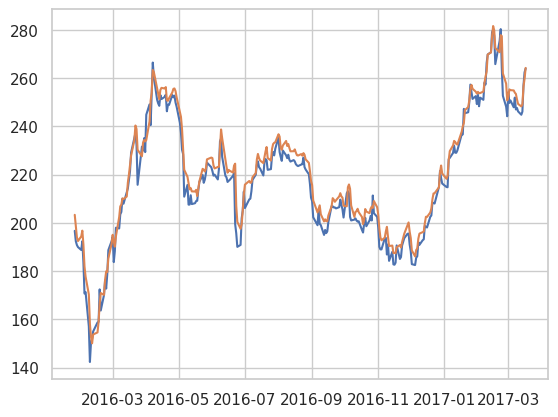

In [40]:

plt.plot(data_new[['Open','open_predicted']])